# Info

**Name:**
Norah Sanad Alsubaie

**About the data:**
Description:
This dataset captures smart home device usage metrics, offering insights into user behavior, device efficiency, and preferences. It includes data on device types, usage patterns, energy consumption, malfunction incidents, and user satisfaction metrics.

Data Source: https://www.kaggle.com/datasets/rabieelkharoua/predict-smart-home-device-efficiency-dataset

# STEP 1: Data Cleaning, Processing, and Visualization

## 1- Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## 2- Load the Dataset

In [4]:
df = pd.read_csv('smart_home_device_usage_data.csv')

##3- Initial exploration

### # 1. DataFrame information

In [5]:
# Display information about the DataFrame
print("DataFrame Information:")
df.info()

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


### # 2.The first rows of a DataFrame

In [6]:
# Print the first 10 rows of the DataFrame
print("The First 10 Rows:")
df.head(10)

The First 10 Rows:


,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
5,6,Thermostat,3.422127,5.038625,1,0,3,1
6,7,Security System,21.065640,2.229344,0,0,56,0
7,8,Security System,23.317096,2.791421,0,0,53,0
8,9,Security System,4.663108,1.780082,1,2,23,1
9,10,Camera,17.468553,7.212756,1,4,58,0


## 4- Check Missing Data

In [7]:
# Check for missing values
print("Missing values check:")
df.isnull().sum()

Missing values check:


UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

## 5- Check for Duplicates

In [8]:
# Print the number of duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


## 6- Check and Handle the Data Type

In [9]:
#Check data types before Processing
df.dtypes

UserID                    int64
DeviceType               object
UsageHoursPerDay        float64
EnergyConsumption       float64
UserPreferences           int64
MalfunctionIncidents      int64
DeviceAgeMonths           int64
SmartHomeEfficiency       int64
dtype: object

In [10]:
# Convert data types
df['UserPreferences'] = df['UserPreferences'].astype('category')
df['SmartHomeEfficiency'] = df['SmartHomeEfficiency'].astype('category')
df['DeviceType'] = df['DeviceType'].astype('category')

# Verify the conversions
print("Data Types After Conversion:\n", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   UserID                5403 non-null   int64   
 1   DeviceType            5403 non-null   category
 2   UsageHoursPerDay      5403 non-null   float64 
 3   EnergyConsumption     5403 non-null   float64 
 4   UserPreferences       5403 non-null   category
 5   MalfunctionIncidents  5403 non-null   int64   
 6   DeviceAgeMonths       5403 non-null   int64   
 7   SmartHomeEfficiency   5403 non-null   category
dtypes: category(3), float64(2), int64(3)
memory usage: 227.5 KB
Data Types After Conversion:
 None


## 7- Detect Outliers

In [11]:
# Detect outliers using Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers_z = (z_scores > 3)

print("\nOutliers detected using Z-score method:")
print(outliers_z)


Outliers detected using Z-score method:
      UserID  UsageHoursPerDay  EnergyConsumption  MalfunctionIncidents  \
0      False             False              False                 False   
1      False             False              False                 False   
2      False             False              False                 False   
3      False             False              False                 False   
4      False             False              False                 False   
...      ...               ...                ...                   ...   
5398   False             False              False                 False   
5399   False             False              False                 False   
5400   False             False              False                 False   
5401   False             False              False                 False   
5402   False             False              False                 False   

      DeviceAgeMonths  
0               False  
1         

In [12]:
# Separate the outliers from the normal data
outliers_data_z = df[outliers_z.any(axis=1)]
normal_data_z = df[~outliers_z.any(axis=1)]

print("\nOutliers data using Z-score method:")
print(outliers_data_z)

print("\nNormal data using Z-score method:")
print(normal_data_z)


Outliers data using Z-score method:
Empty DataFrame
Columns: [UserID, DeviceType, UsageHoursPerDay, EnergyConsumption, UserPreferences, MalfunctionIncidents, DeviceAgeMonths, SmartHomeEfficiency]
Index: []

Normal data using Z-score method:
      UserID       DeviceType  UsageHoursPerDay  EnergyConsumption  \
0          1    Smart Speaker         15.307188           1.961607   
1          2           Camera         19.973343           8.610689   
2          3  Security System         18.911535           2.651777   
3          4           Camera          7.011127           2.341653   
4          5           Camera         22.610684           4.859069   
...      ...              ...               ...                ...   
5398    5399       Thermostat          4.556314           5.871764   
5399    5400           Lights          0.561856           1.555992   
5400    5401    Smart Speaker         11.096236           7.677779   
5401    5402  Security System          8.782169           

## 8- Normalization

In [13]:
#Normalization of Float Value Columns
scaler = StandardScaler()
ColsToNormalize = ['UsageHoursPerDay', 'EnergyConsumption']
scaled_data = scaler.fit(df[ColsToNormalize])
df[ColsToNormalize] = scaler.transform(df[ColsToNormalize])

In [14]:
min_max_scaler = MinMaxScaler()
df[ColsToNormalize] = min_max_scaler.fit_transform(df[ColsToNormalize])

In [15]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,MalfunctionIncidents,DeviceAgeMonths
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,0.491855,0.500453,2.066445,30.312234
std,1559.856083,0.285912,0.290905,1.423291,16.990525
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1351.500000,0.246811,0.244875,1.000000,15.000000
50%,2702.000000,0.485501,0.495678,2.000000,30.000000
75%,4052.500000,0.736202,0.758889,3.000000,45.000000
max,5403.000000,1.000000,1.000000,4.000000,59.000000


## 9- Check for inconsistencies

In [16]:
# Print value counts for inconsistencies
print(df.value_counts())

UserID  DeviceType       UsageHoursPerDay  EnergyConsumption  UserPreferences  MalfunctionIncidents  DeviceAgeMonths  SmartHomeEfficiency
1       Smart Speaker    0.630414          0.187950           1                4                     36               1                      1
3600    Smart Speaker    0.130376          0.512746           1                4                     13               0                      1
3608    Lights           0.002296          0.479643           1                4                     3                1                      1
3607    Thermostat       0.049276          0.197560           1                4                     53               0                      1
3606    Security System  0.537759          0.103179           1                1                     54               1                      1
                                                                                                                                            ..
1800

## 9- Visuilization

### # 1. Distribution of Device Types

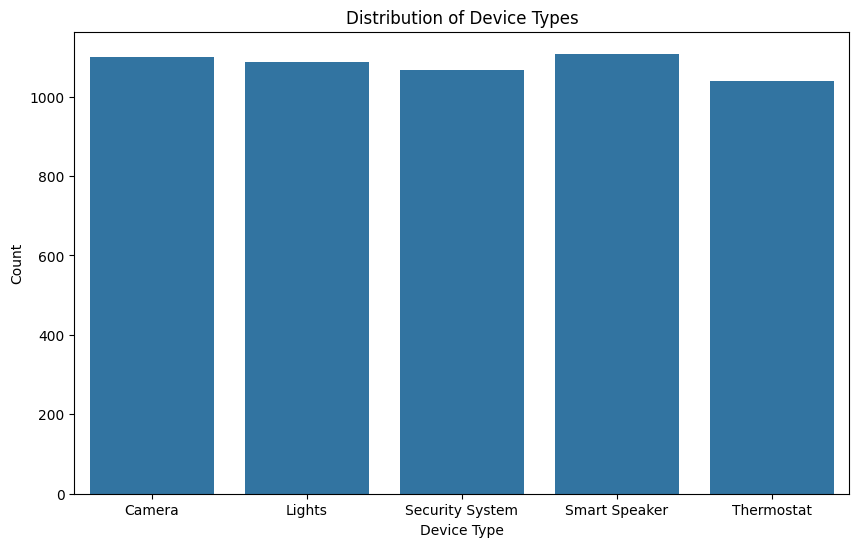

In [17]:
# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Plot the countplot
sns.countplot(x='DeviceType', data=df)

# Add title and labels
plt.title('Distribution of Device Types')
plt.xlabel('Device Type')
plt.ylabel('Count')

# Display the plot
plt.show()

### # 2. Energy Consumption vs. Device Type

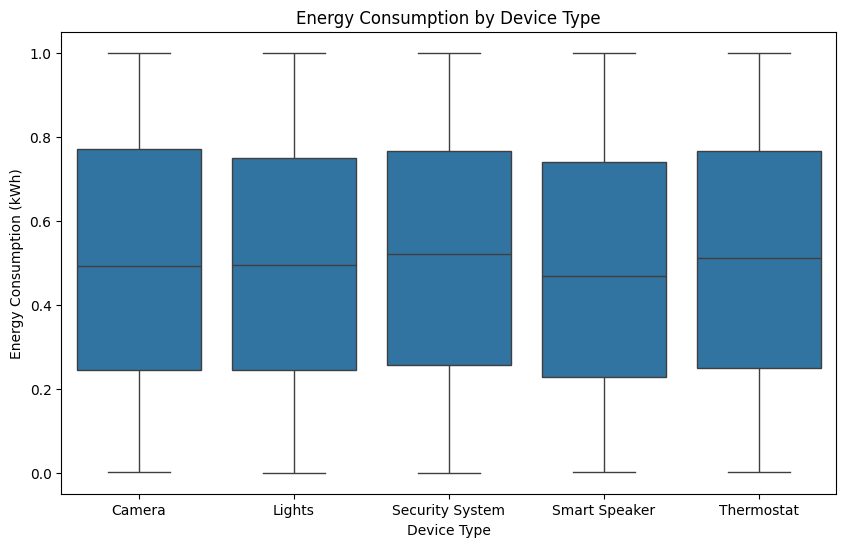

In [18]:
# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Plot a boxplot of 'EnergyConsumption' by 'DeviceType'
sns.boxplot(x='DeviceType', y='EnergyConsumption', data=df)

# Add title and labels
plt.title('Energy Consumption by Device Type')
plt.xlabel('Device Type')
plt.ylabel('Energy Consumption (kWh)')

# Display the plot
plt.show()

### # 3. User Preferences

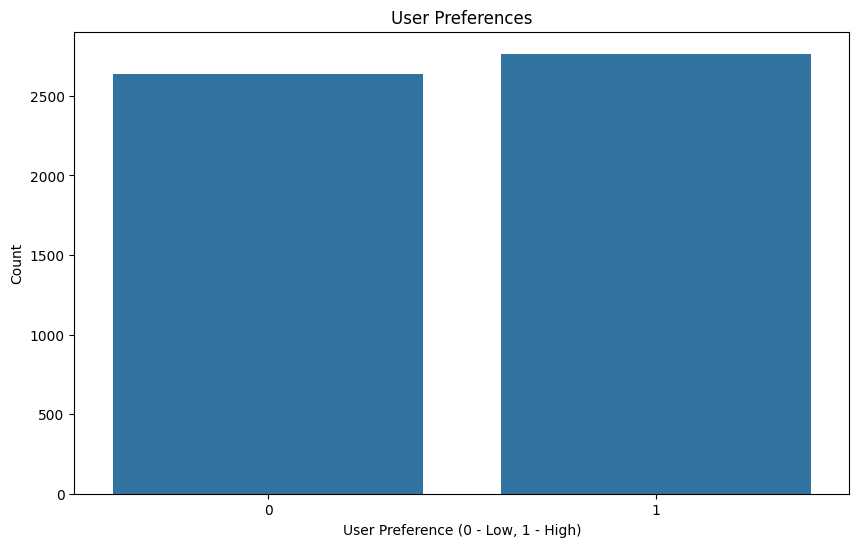

In [19]:
# Create a figure with specific size
plt.figure(figsize=(10, 6))

# Plot a countplot of 'UserPreferences'
sns.countplot(x='UserPreferences', data=df)

# Add title and labels
plt.title('User Preferences')
plt.xlabel('User Preference (0 - Low, 1 - High)')
plt.ylabel('Count')

# Display the plot
plt.show()

### # 4. Smart Home Efficiency

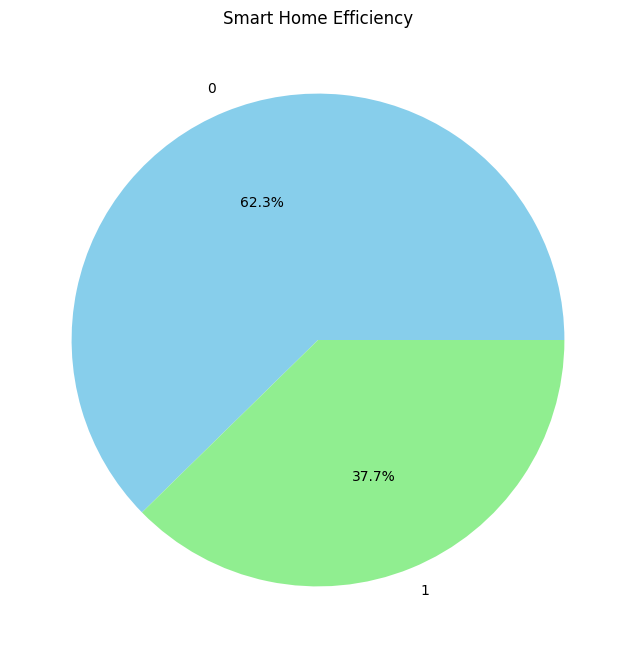

In [20]:
# Create a figure with specific size
plt.figure(figsize=(8, 8))

# Plot a pie chart of 'SmartHomeEfficiency' column
df['SmartHomeEfficiency'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])

# Add title and formatting
plt.title('Smart Home Efficiency')
plt.ylabel('')  # Remove the default ylabel

# Display the plot
plt.show()

#  STEP 2 : Basic Descriptive Statistics

## 1- Numerical Columns

In [21]:
# Compute descriptive statistics for numerical columns
numerical_stats = df.describe()

print("Descriptive Statistics for Numerical Columns:")
numerical_stats

Descriptive Statistics for Numerical Columns:


,UserID,UsageHoursPerDay,EnergyConsumption,MalfunctionIncidents,DeviceAgeMonths
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,0.491855,0.500453,2.066445,30.312234
std,1559.856083,0.285912,0.290905,1.423291,16.990525
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1351.500000,0.246811,0.244875,1.000000,15.000000
50%,2702.000000,0.485501,0.495678,2.000000,30.000000
75%,4052.500000,0.736202,0.758889,3.000000,45.000000
max,5403.000000,1.000000,1.000000,4.000000,59.000000


## 2- Categorical Columns

In [22]:
# Compute descriptive statistics for categorical columns
categorical_stats = df.describe(include='category')

print("\nDescriptive Statistics for Categorical Columns:")
categorical_stats


Descriptive Statistics for Categorical Columns:


,DeviceType,UserPreferences,SmartHomeEfficiency
count,5403,5403,5403
unique,5,2,2
top,Smart Speaker,1,0
freq,1108,2765,3368


# STEP 3: Machine Learning Algorithms

In [ ]:
# Importing necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## Linear Regression Model

In [38]:
# Selecting features and target variable
y = df['SmartHomeEfficiency']
X = df.drop(['SmartHomeEfficiency', 'UserID', 'DeviceType'], axis=1)  # Dropping unnecessary columns for prediction

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Make predictions on the test set
predictions = lr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.27
Mean Squared Error: 0.11
R-squared: 0.51


## Random Forest Regressor

In [40]:
# Selecting features and target variable
y = df['SmartHomeEfficiency']
X = df.drop(['SmartHomeEfficiency', 'UserID', 'DeviceType'], axis=1)  # Dropping unnecessary columns for prediction

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # Example parameters

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
predictions = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.09
Mean Squared Error: 0.05
R-squared: 0.80


## Final Result

In [42]:
# Define the dictionary of models
model_dic = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor()
}

# Loop through each model
for model_n in model_dic.keys():
    model = model_dic[model_n]
    model.fit(X_train, y_train)  # Train the model

    # Evaluate the model
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Print scores
    print("======")
    print("Model:", model_n)
    print(f'Mean Absolute Error: {mae:.2f}')
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'R-squared: {r2:.2f}')
    print("Train Score:", model.score(X_train, y_train))

Model: LinearRegression
Mean Absolute Error: 0.27
Mean Squared Error: 0.11
R-squared: 0.51
Train Score: 0.49301928831824926
Model: RandomForestRegressor
Mean Absolute Error: 0.09
Mean Squared Error: 0.05
R-squared: 0.80
Train Score: 0.9680541105856841
